**Задача 1.** Оценить вероятность того, что на игральной кости выпадет больше 4 очков. Сравнить с теоретической вероятностью.

In [2]:
import numpy as np

trials = 1000    # Количество попыток
successes = 0    # Количество успехов

for i in range(trials):
    random_score = np.random.randint(1, 7)    # Случайное количество очков от 1 до 6
    if random_score > 4:
        successes += 1
        
p_monte_carlo = successes / trials    # Вероятность из моделирования
p = 2 / 6                             # Теоретическая вероятность

print(successes, trials, p_monte_carlo, p)

333 1000 0.333 0.3333333333333333


**Задача 1А** (опциональная). Дан квадрат, в который вписан круг (касаясь сторон квадрата). В квадрат случайным образом попадают точки. Какова вероятность, что наугад взятая точка попадёт внутрь круга?
_Подсказка:_ Удобно взять квардат со стороной, равной 2, и отсчитывать координаты точек от его центра.

In [4]:
trials = 1000000
successes = 0

for i in range(trials):
    # Генерируем не одну, а две случайных величины - координаты точки
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    
    if # что должно быть здесь?
        successes += 1
        
print(successes / trials)

0.785763


**Задача 2.** Смоделировать стрельбу по мишени.

In [5]:
import matplotlib.pyplot as plt

shots = 1000    # Количество выстрелов
std_dev = 2.0   # Стандартное отклонение    

x = np.random.normal(0, std_dev, shots)
y = np.random.normal(0, std_dev, shots)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_aspect(1.0)

**Задача 3.** Построить распределение измеренных значений физической величины, когда измерительный прибор имеет случайную погрешность. Сравнить с равномерным и нормальным распределениями

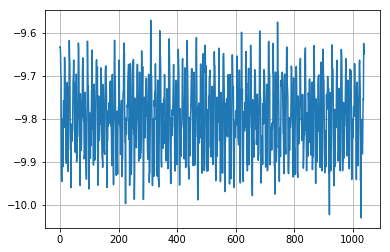

In [6]:
import pandas as pd

data = pd.read_csv("data.log", sep=" ")["az"]
#data = np.random.uniform(-10, -9, 10000)
#data = np.random.normal(-9.8, 0.3, 10000)

plt.plot(data)
plt.grid()
    

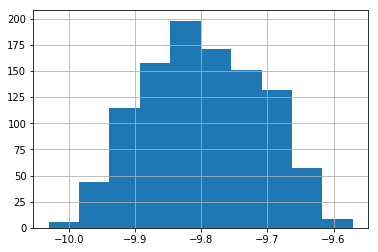

In [7]:
bins = 10    # Количество интервалов гистограммы
plt.hist(data, bins=np.linspace(min(data), max(data), bins + 1))
plt.grid()

**Задача 4.** Рассчитать вероятность того, что пациент заражён COVID-19, если известно, что тест дал положительный результат. Сравнить с результатом моделирования.

In [9]:
prev = 0.50    # Распространённость болезни
sens = 0.95    # Чувствительность теста
spec = 0.80    # Специфичность теста

p = (sens * prev) / (sens * prev + (1 - spec) * (1 - prev))   # Теоретическая вероятность 
print(p)

0.8260869565217391


In [10]:
population = 1000000    # Количество испытуемых

true_pos = 0    # Количество больных с положительным тестом
false_pos = 0   # Количество здоровых с положительным тестом

for i in range(population):
    # Наугад решаем, заражён ли человек
    infected = np.random.uniform() < prev
    
    # Наугад решаем, дал ли тест положительный результат 
    positive = np.random.uniform() < sens if infected else np.random.uniform() < 1 - spec
    
    if positive:
        if infected:
            true_pos += 1
        else:
            false_pos += 1
            
p_monte_carlo = true_pos / (true_pos + false_pos)    # Вероятность из моделирования
print(p_monte_carlo)

0.8262489044697634
